In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

In [2]:
import sys
module_path = '/Users/junhaoxiong 1/Documents/Projects/mgcpy'
if module_path not in sys.path:
    sys.path.append(module_path)
from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.benchmarks.power import power
from mgcpy.benchmarks.simulations import linear_sim, quad_sim, ubern_sim, exp_sim, w_sim, joint_sim, spiral_sim

In [3]:
def compute_distance_matrix(data_matrix_X, data_matrix_Y):
    # obtain the pairwise distance matrix for X and Y
    dist_mtx_X = squareform(pdist(data_matrix_X, metric='euclidean'))
    dist_mtx_Y = squareform(pdist(data_matrix_Y, metric='euclidean'))
    return (dist_mtx_X, dist_mtx_Y)

## Test Statistic

In [4]:
def test_stats_vs_dimension(corr_type, simulation_type, dim_range):
    test_stats = []
    for d in range(1, dim_range+1):
        x, y = simulation_type(num_samp=100, num_dim=d, noise=0)
        corr = DCorr(data_matrix_X=x, data_matrix_Y=y, compute_distance_matrix=compute_distance_matrix, corr_type=corr_type)
        test_stats.append(corr.test_statistic())
    return test_stats

In [19]:
def plot_test_stats(simulation_type, dim_range, simulation_name):
    mcorr_test_stats = test_stats_vs_dimension('mcorr', simulation_type, dim_range)
    print(mcorr_test_stats)
    dcorr_test_stats = test_stats_vs_dimension('dcorr', simulation_type, dim_range)
    mantel_test_stats = test_stats_vs_dimension('mantel', simulation_type, dim_range)    
    plt.plot(mcorr_test_stats, label='MCorr')
    plt.plot(dcorr_test_stats, label='DCorr')
    plt.plot(mantel_test_stats, label='Mantel')
    plt.xlabel('Dimensions')
    plt.ylabel('Test Statistics')
    plt.legend()
    plt.gca().set_xlim(1, dim_range+1)
    plt.xticks(np.arange(0, dim_range+1, 5))
    plt.title('Test Statistics \n Data: {} Simulation, 100 samples, noise=0'.format(simulation_name))
    plt.show()

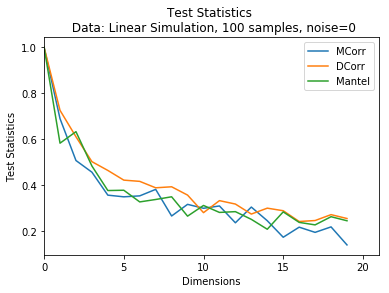

In [6]:
plot_test_stats(linear_sim, 20, 'Linear')

[0.009211688269379624, 0.6782987754669881, 0.675625736339358, 0.6270173088707394, 0.6343666472683498, 0.7003249760415822, 0.673322528653084, 0.6270938696614978, 0.574917320768806, 0.7101416845563167, 0.7406931813715562, 0.7345528729591526, 0.6736680344538872, 0.6943697877122087, 0.7537588903483154, 0.654895643905753, 0.6472124224162914, 0.6189214565221189, 0.6283554131629553, 0.7241088105607169]


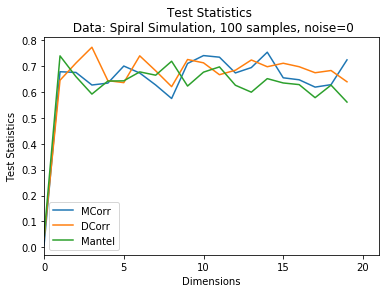

In [20]:
plot_test_stats(spiral_sim, 20, 'Spiral')

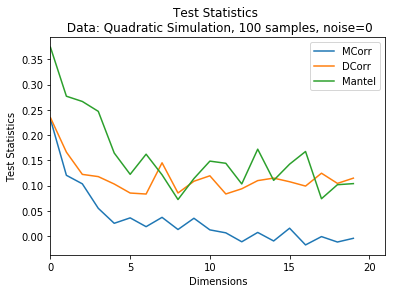

In [8]:
plot_test_stats(quad_sim, 20, 'Quadratic')

## P-value

In [9]:
def pvalue_vs_dimension(corr_type, simulation_type, dim_range):
    p_value = []
    for d in range(1, dim_range+1):
        x, y = simulation_type(num_samp=100, num_dim=d, noise=0)
        corr = DCorr(data_matrix_X=x, data_matrix_Y=y, compute_distance_matrix=compute_distance_matrix, corr_type=corr_type)
        p_value.append(corr.p_value())
    return p_value

In [10]:
def plot_p_value(simulation_type, dim_range, simulation_name):
    mcorr_pvalue = pvalue_vs_dimension('mcorr', simulation_type, dim_range)
    dcorr_pvalue = pvalue_vs_dimension('dcorr', simulation_type, dim_range)
    mantel_pvalue = pvalue_vs_dimension('mantel', simulation_type, dim_range)    
    plt.plot(mcorr_pvalue, label='MCorr')
    plt.plot(dcorr_pvalue, label='DCorr')
    plt.plot(mantel_pvalue, label='Mantel')
    plt.xlabel('Dimensions')
    plt.ylabel('pvalue')
    plt.legend()
    plt.gca().set_xlim(1, dim_range+1)
    plt.xticks(np.arange(0, dim_range+1, 5))
    plt.title('P-value \n Data: {} Simulation, 100 samples, noise=0'.format(simulation_name))
    plt.show()

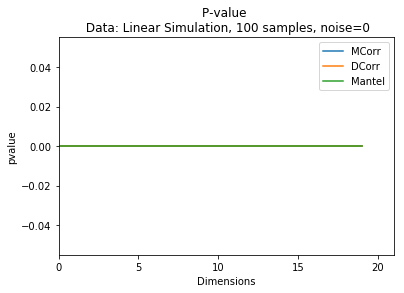

In [11]:
plot_p_value(linear_sim, 20, 'Linear')

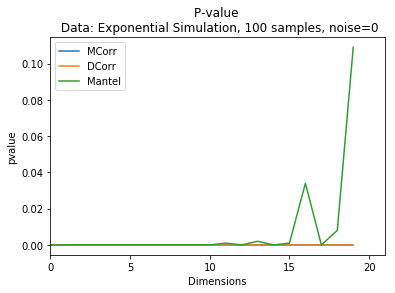

In [18]:
plot_p_value(exp_sim, 20, 'Exponential')

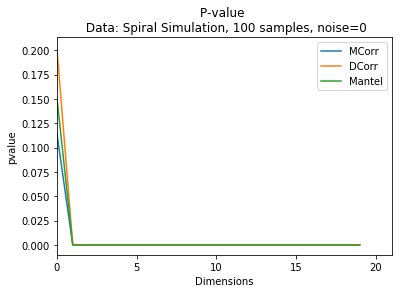

In [12]:
plot_p_value(spiral_sim, 20, 'Spiral')

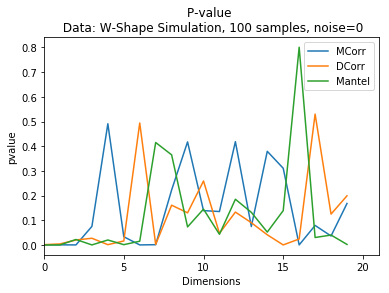

In [13]:
plot_p_value(w_sim, 20, 'W-Shape')

## Power

In [14]:
def power_vs_dimension(corr_type, simulation_type, dim_range):
    '''
    Generate power of an independence test given a simulation for a range of dimensions
    
    :param simulation_type: a simulation function from mgcpy.benchmarks.simulations
    :param dim_range: the upper end of the range of dimension
    :return: power for each dimension
    '''
    estimated_power = []
    for d in range(1, dim_range+1):
        corr = DCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan, 
                        compute_distance_matrix=compute_distance_matrix, corr_type=corr_type)
        estimated_power.append(power(corr, simulation_type, num_samples=100, num_dimensions=d))
    return estimated_power

In [15]:
def plot_power_curve(simulation_type, dim_range, simulation_name):
    mcorr_power = power_vs_dimension('mcorr', simulation_type, dim_range)
    dcorr_power = power_vs_dimension('dcorr', simulation_type, dim_range)
    mantel_power = power_vs_dimension('mantel', simulation_type, dim_range)    
    plt.plot(mcorr_power, label='MCorr')
    plt.plot(dcorr_power, label='DCorr')
    plt.plot(mantel_power, label='Mantel')
    plt.xlabel('Dimensions')
    plt.ylabel('Power')
    plt.legend()
    plt.gca().set_xlim(1, dim_range+1)
    plt.xticks(np.arange(1, len(mcorr_power)+1))
    plt.title('Power \n Data: {} Simulation, 100 samples, noise=0'.format(simulation_name))
    plt.show()

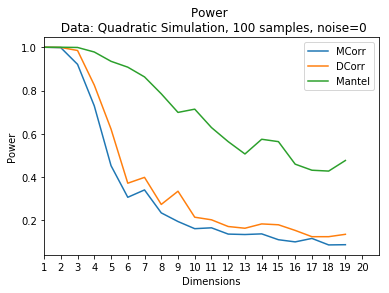

In [16]:
plot_power_curve(quad_sim, 20, 'Quadratic')

In [17]:
plot_power_curve(joint_sim, 10, 'Joint Normal')

KeyboardInterrupt: 

In [ ]:
plot_power_curve(spiral_sim, 20, 'Spiral')